# Task 1 - Exploratory Data Analysis
In this section, you will: 
- Load the necessary packages required for executing the code
- Load the data
- Summarize the features in the data set using descriptive statistics
- Study the features and their interrelationships using various visualizations and pivot tables

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

In [29]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
df = pd.read_csv('Ames_Housing_Subset_2.csv', index_col = 'PID')
df.head()

,LotArea,Age,TotalBsmtSF,CentralAir,LotShape,SalePrice
PID,,,,,,
526301100,31770,51,1080,Y,IR1,215000
526350040,11622,50,882,Y,Reg,105000
526351010,14267,53,1329,Y,IR1,172000
526353030,11160,43,2110,Y,Reg,244000
527105010,13830,14,928,Y,IR1,189900


Feature description:
- PID: The unique identifier for a property
- LotArea: The area in square feet of the lot on which the property is built
- Age: The age of the property in years
- TotalBsmtSF: The area of the basement of the property in square feet
- CentralAir: Whether the property is centrally air conditioned or not
- Lot Shape: The shape of the lot (regular: Reg, irregular: IR1, IR2, IR3)
- SalePrice: The current selling price of the property in dollars

In [30]:
# Look at the specifics of the data frame using the '.info()' command
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 526301100 to 924151050
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LotArea      2929 non-null   int64 
 1   Age          2929 non-null   int64 
 2   TotalBsmtSF  2929 non-null   int64 
 3   CentralAir   2929 non-null   object
 4   LotShape     2929 non-null   object
 5   SalePrice    2929 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 160.2+ KB


In [31]:
# Store the names of numerical and categorical features in separate lists
num_col_names = ['LotArea', 'Age', 'TotalBsmtSF', 'SalePrice']
cat_col_names = ['CentralAir', 'LotShape']

In [32]:
# Convert qualitative predictors to the 'category' data type using the '.astype()' command
df[cat_col_names] = df[cat_col_names].astype('category')

In [33]:
# Summarize the numerical features in the data set using descriptive statistics using the '.describe()' command
df[num_col_names].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LotArea,2929.0,10148.062820,7881.359580,1300.0,7440.0,9434.0,11556.0,215245.0
Age,2929.0,39.655514,30.243747,1.0,10.0,38.0,57.0,139.0
TotalBsmtSF,2929.0,1051.483441,440.870834,0.0,793.0,990.0,1302.0,6110.0
SalePrice,2929.0,180800.599522,79899.955086,12789.0,129500.0,160000.0,213500.0,755000.0


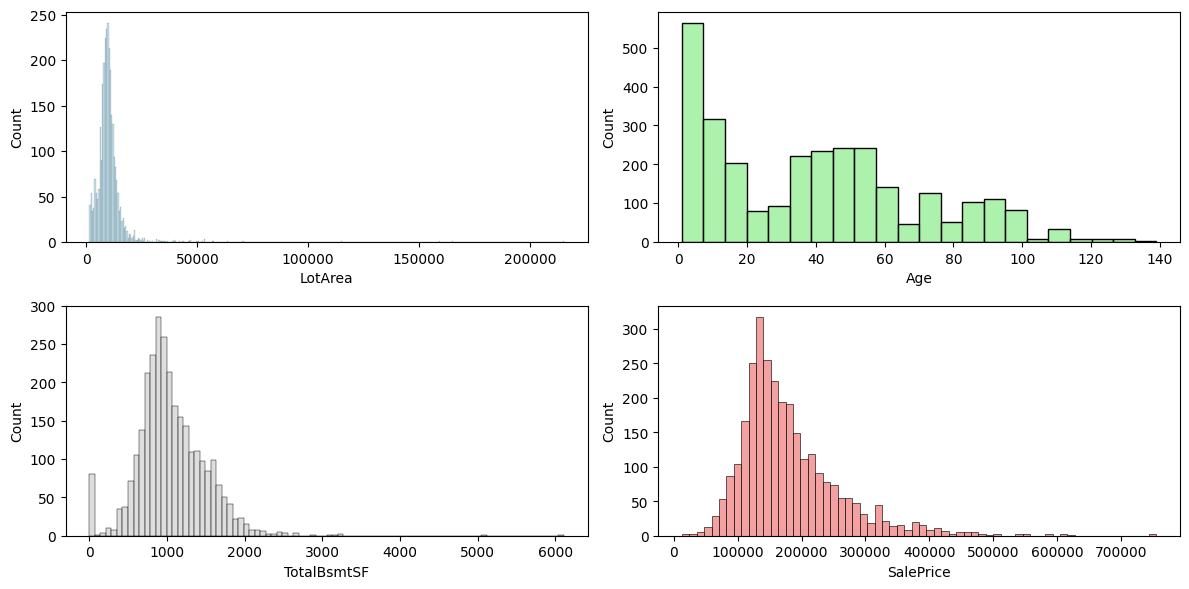

In [34]:
# Create histograms for the variables 'LotArea', 'Age', 'TotalBsmtSF' and 'SalePrice'
plt.figure(figsize = (12, 6))

colorname = ['lightblue', 'lightgreen', 'lightgray', 'lightcoral']
fignum = 0
for featurename in num_col_names:
    fignum = fignum + 1
    plt.subplot(2, 2, fignum)
    sns.histplot(data = df, x = featurename, color = colorname[fignum - 1])

plt.tight_layout();

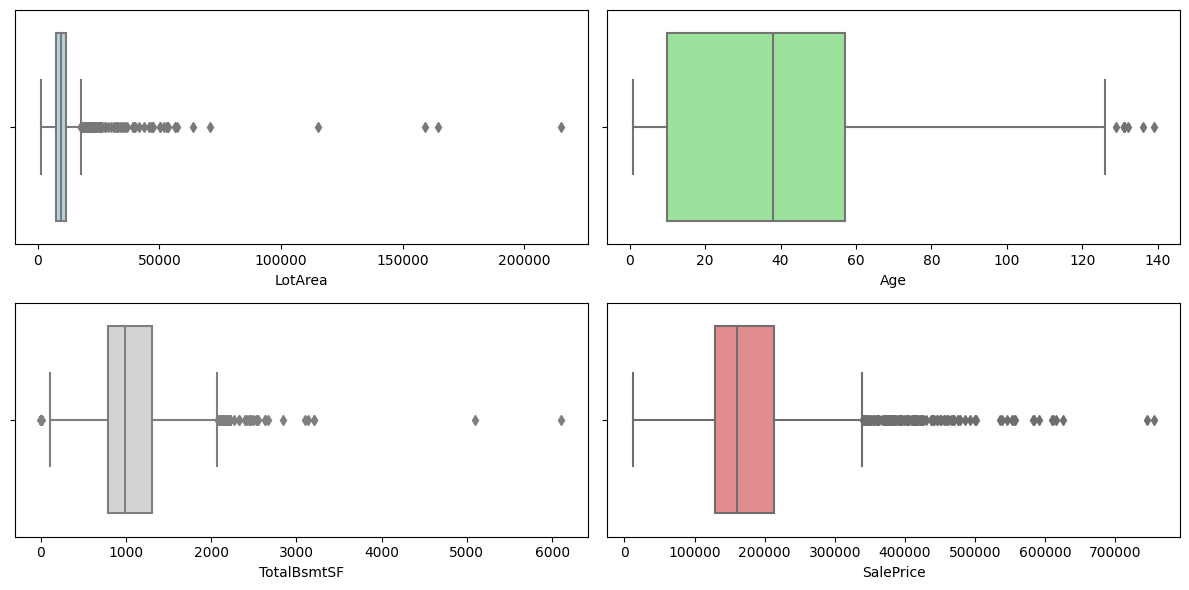

In [35]:
# Create box plots for the variables 'LotArea', 'Age', 'TotalBsmtSF' and 'SalePrice'
plt.figure(figsize = (12, 6))

colorname = ['lightblue', 'lightgreen', 'lightgray', 'lightcoral']
fignum = 0
for featurename in num_col_names:
    fignum = fignum + 1
    plt.subplot(2, 2, fignum)
    sns.boxplot(data = df, x = featurename, color = colorname[fignum - 1])

plt.tight_layout();

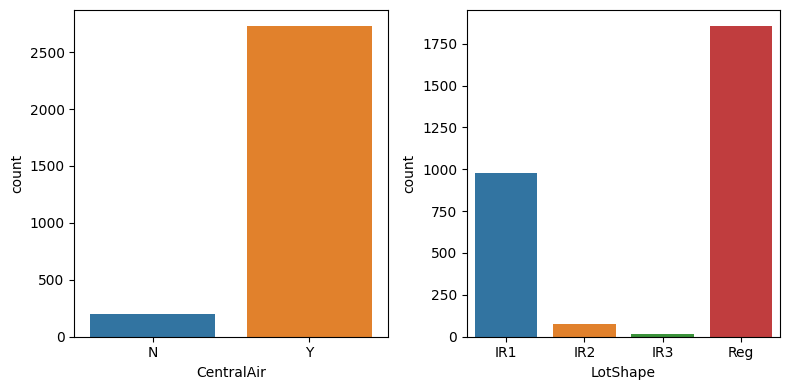

In [36]:
# Create count plots for the variables 'CentralAir' and 'LotShape'
plt.figure(figsize = (8, 4))

fignum = 0
for featurename in cat_col_names:
    fignum = fignum + 1
    plt.subplot(1, 2, fignum)
    sns.countplot(data = df, x = featurename)
    
plt.tight_layout();

C:\Users\Vr3n\AppData\Local\Temp\ipykernel_8828\932778369.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df[featurename], y = df['SalePrice'], ci = None)
C:\Users\Vr3n\AppData\Local\Temp\ipykernel_8828\932778369.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = df[featurename], y = df['SalePrice'], ci = None)


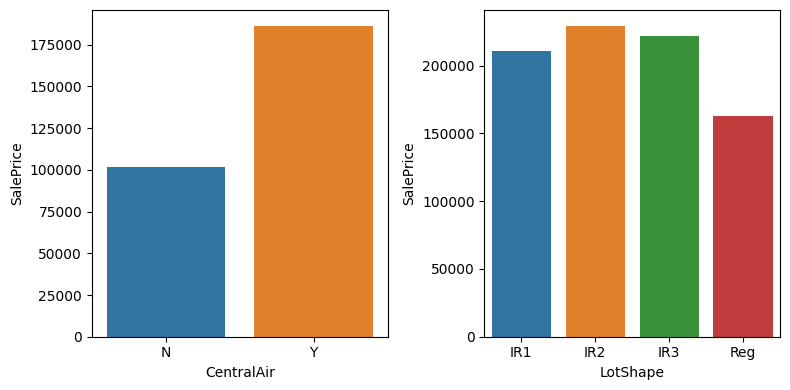

In [37]:
# Create bar plots for the variables 'CentralAir' and 'LotShape' with 'SalePrice' on the Y-axis
plt.figure(figsize = (8, 4))

fignum = 0
for featurename in cat_col_names:
    fignum = fignum + 1
    plt.subplot(1, 2, fignum)
    sns.barplot(x = df[featurename], y = df['SalePrice'], ci = None)
    
plt.tight_layout();

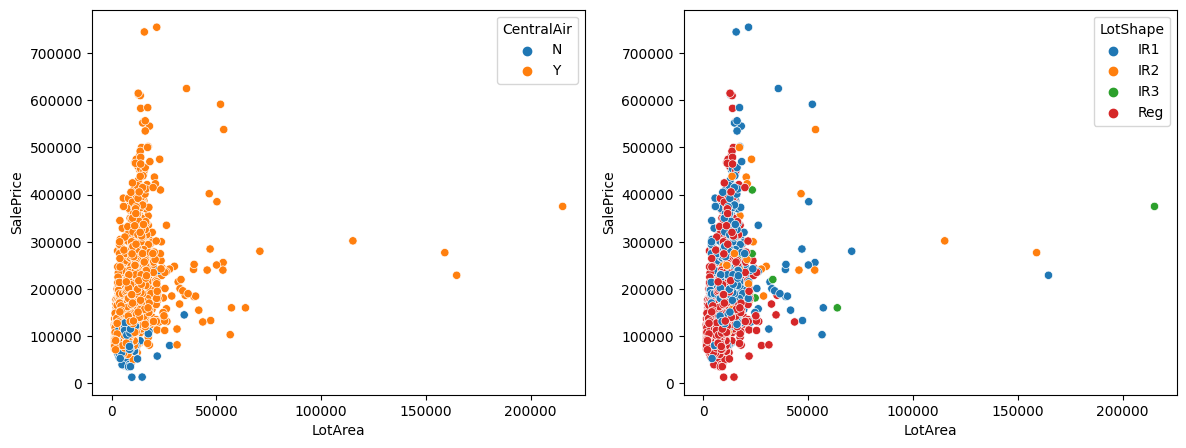

In [38]:
# Create scatter plots of 'SalePrice' versus 'LotArea', one colored by 'CentralAir' and the other by 'LotShape'
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'LotArea', y = 'SalePrice', hue = 'CentralAir')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'LotArea', y = 'SalePrice', hue = 'LotShape');

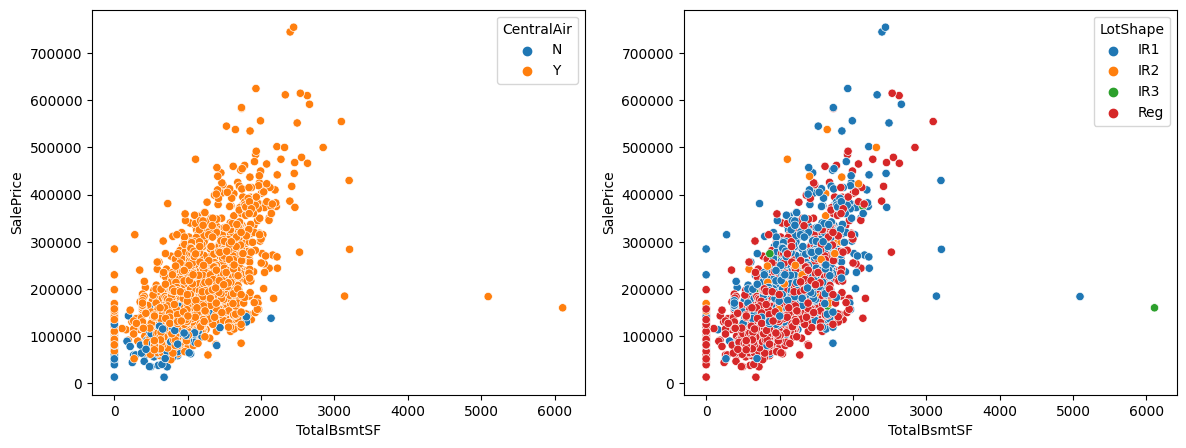

In [39]:
# Create scatter plots of 'SalePrice' versus 'TotalBsmtSF', one colored by 'CentralAir' and the other by 'LotShape'
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'TotalBsmtSF', y = 'SalePrice', hue = 'CentralAir')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'TotalBsmtSF', y = 'SalePrice', hue = 'LotShape');

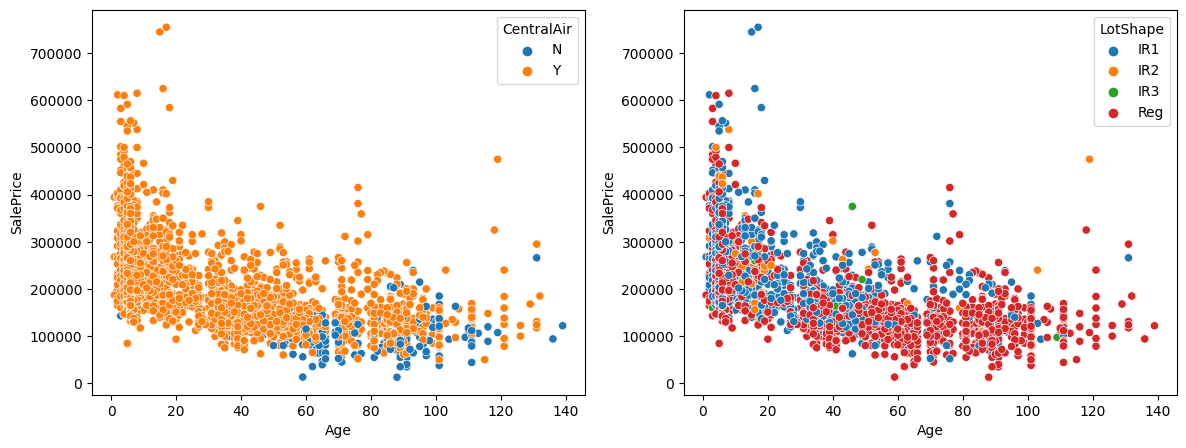

In [40]:
# Create scatter plots of 'SalePrice' versus 'Age', one colored by 'CentralAir' and the other by 'LotShape'
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'Age', y = 'SalePrice', hue = 'CentralAir')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'Age', y = 'SalePrice', hue = 'LotShape');

In [41]:
# Create a pivot table of count of 'SalePrice' with respect to 'CentralAir' and 'LotShape'
pd.pivot_table(data = df, values = 'SalePrice', index = 'CentralAir', columns = 'LotShape', aggfunc = 'count', margins = True)

LotShape,IR1,IR2,IR3,Reg,All
CentralAir,,,,,
N,25,1,2,168,196
Y,954,75,14,1690,2733
All,979,76,16,1858,2929


In [42]:
# Create a pivot table of mean 'SalePrice' with respect to 'CentralAir' and 'LotShape'
pd.pivot_table(data = df, values = 'SalePrice', index = 'CentralAir', columns = 'LotShape', aggfunc = 'mean', margins = True)

LotShape,IR1,IR2,IR3,Reg,All
CentralAir,,,,,
N,130789.920000,110000.000000,85250.0000,97739.797619,101890.479592
Y,213025.333333,231182.866667,241447.5000,169023.239053,186459.722649
All,210925.348315,229588.355263,221922.8125,162577.804090,180800.599522


C:\Users\Vr3n\AppData\Local\Temp\ipykernel_8828\3261445126.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = df, x = 'LotShape', y = 'SalePrice', hue = 'CentralAir', ci = None);


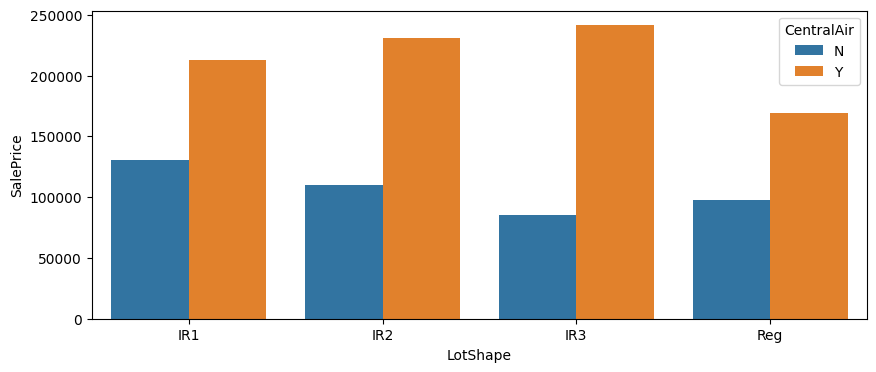

In [43]:
# Create a bar plot corresponding to the pivot table above
plt.figure(figsize = (10, 4))
sns.barplot(data = df, x = 'LotShape', y = 'SalePrice', hue = 'CentralAir', ci = None);

C:\Users\Vr3n\codes\upgrad-maryland-analytics\upgrad_venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


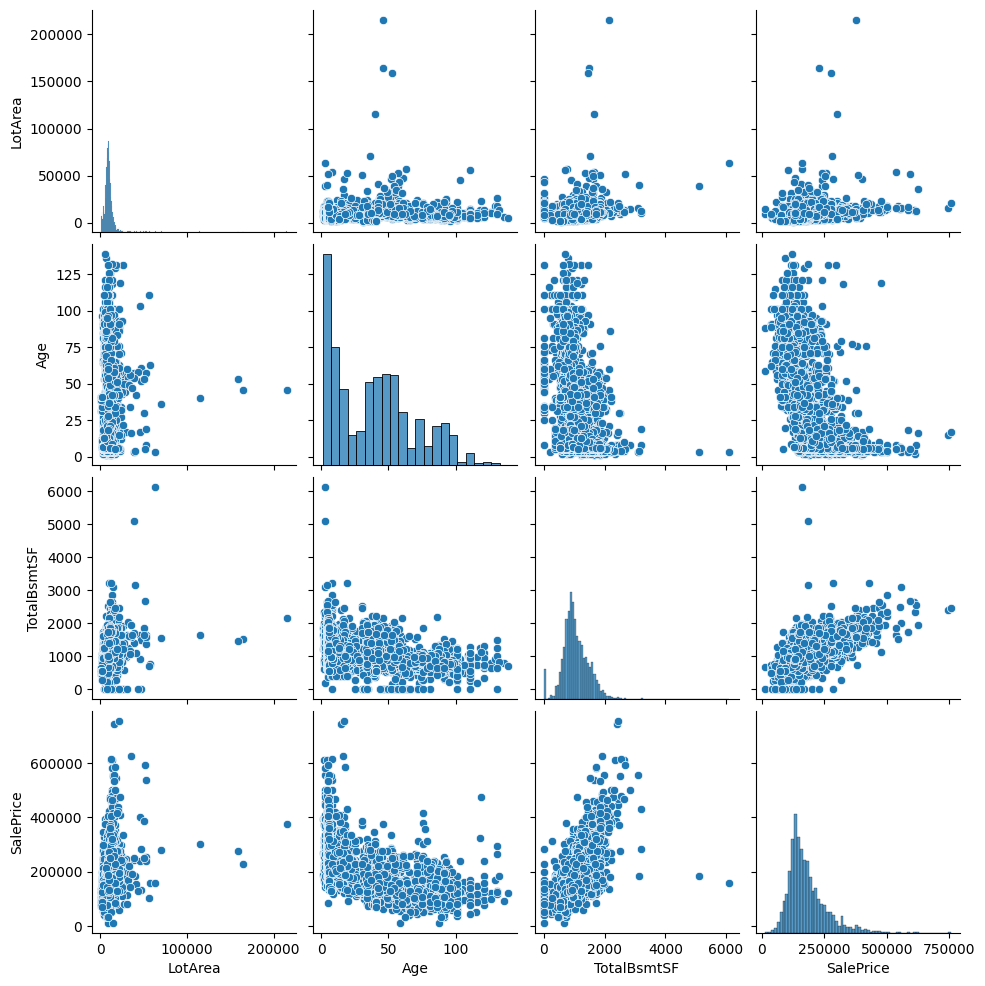

In [17]:
# Create a pair plot for the data
sns.pairplot(df);

# Task 2 : Linear Regression Using Qualitative Predictors
In this section, you will train and evaluate the following simple linear regression models:
- SalePrice vs CentralAir
- SalePrice vs LotShape

### Model 1

In [44]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'CentralAir'
lr_model_1 = smf.ols('SalePrice ~ CentralAir', data = df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           4.33e-48
Time:                        22:05:00   Log-Likelihood:                -37113.
No. Observations:                2929   AIC:                         7.423e+04
Df Residuals:                    2927   BIC:                         7.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.019e+05   5504.783     

### Model 2

In [45]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'Y' after generating a suitable dataframe with dummy variables
df_dummy = pd.get_dummies(df['CentralAir'])
df_dummy['SalePrice'] = df['SalePrice']
lr_model_2 = smf.ols('SalePrice ~ Y', data = df_dummy)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     220.2
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           4.33e-48
Time:                        22:05:01   Log-Likelihood:                -37113.
No. Observations:                2929   AIC:                         7.423e+04
Df Residuals:                    2927   BIC:                         7.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.019e+05   5504.783     18.509      0.0

### Model 3

In [46]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotShape'
lr_model_3 = smf.ols('SalePrice ~ LotShape', data = df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     98.39
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.13e-60
Time:                        22:05:02   Log-Likelihood:                -37079.
No. Observations:                2929   AIC:                         7.417e+04
Df Residuals:                    2925   BIC:                         7.419e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.109e+05   2435.014     

### Model 4

In [47]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'IR1', 'IR2' and 'IR3' after generating a suitable dataframe with dummy variables
df_dummy = pd.get_dummies(df['LotShape'])
df_dummy['SalePrice'] = df['SalePrice']
lr_model_4 = smf.ols('SalePrice ~ IR1 + IR2 + IR3', data = df_dummy)
lr_model_4 = lr_model_4.fit()
print(lr_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     98.39
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.13e-60
Time:                        22:05:04   Log-Likelihood:                -37079.
No. Observations:                2929   AIC:                         7.417e+04
Df Residuals:                    2925   BIC:                         7.419e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.626e+05   1767.543     91.980      

# Task 3 - Linear Regression Using Numerical and Qualitative Predictors
In this section, you will train and evaluate the following multiple linear regression models:
  - SalePrice vs LotArea
  - SalePrice vs LotArea and CentralAir
  - SalePrice vs LotArea, Age, TotalBsmtSF, CentralAir and LotShape

### Model 5

In [48]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea'
lr_model_5 = smf.ols('SalePrice ~ LotArea', data = df)
lr_model_5 = lr_model_5.fit()
print(lr_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     223.9
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           7.93e-49
Time:                        22:07:37   Log-Likelihood:                -37112.
No. Observations:                2929   AIC:                         7.423e+04
Df Residuals:                    2927   BIC:                         7.424e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.534e+05   2320.465     66.098      0.0

### Model 6

In [49]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea' and 'CentralAir'
# Note: Set the base category of 'CentralAir' to 'Y' using the '.cat.set_categories()' command
df['CentralAir'] = df['CentralAir'].cat.set_categories(['Y', 'N'])
lr_model_6 = smf.ols('SalePrice ~ LotArea + CentralAir', data = df)
lr_model_6 = lr_model_6.fit()
print(lr_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     226.8
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           2.58e-92
Time:                        22:07:39   Log-Likelihood:                -37009.
No. Observations:                2929   AIC:                         7.402e+04
Df Residuals:                    2926   BIC:                         7.404e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.601e+05   2286.861     

### Model 7

In [50]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'SalePrice' using 'LotArea', 'Age', 'TotalBsmtSF', 'CentralAir' and 'LotShape'
# Note: Set the base category of 'CentralAir' to 'Y' and the base category of 'LotShape' to 'Reg' using the '.cat.set_categories()' command
df['CentralAir'] = df['CentralAir'].cat.set_categories(['Y', 'N'])
df['LotShape'] = df['LotShape'].cat.set_categories(['Reg', 'IR1', 'IR2', 'IR3'])
lr_model_7 = smf.ols('SalePrice ~ LotArea + Age + TotalBsmtSF + CentralAir + LotShape', data = df)
lr_model_7 = lr_model_7.fit()
print(lr_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     482.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:07:40   Log-Likelihood:                -36095.
No. Observations:                2929   AIC:                         7.221e+04
Df Residuals:                    2921   BIC:                         7.225e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         1.15e+05   3753.663     

# Task 4 - Diagnostic Plots
In this section, you will create and analyze diagnostic plots for *lr_model_7*

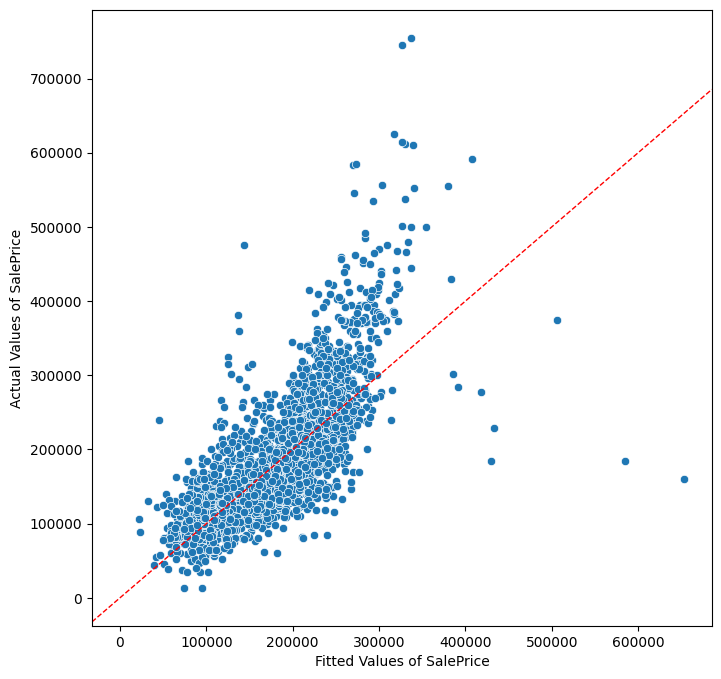

In [51]:
# Create a scatter plot between the fitted and actual values of 'SalePrice'
plt.figure(figsize = (8, 8))
sns.scatterplot(x = lr_model_7.fittedvalues, y = df['SalePrice'])
plt.axline((100, 100), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of SalePrice')
plt.ylabel('Actual Values of SalePrice');

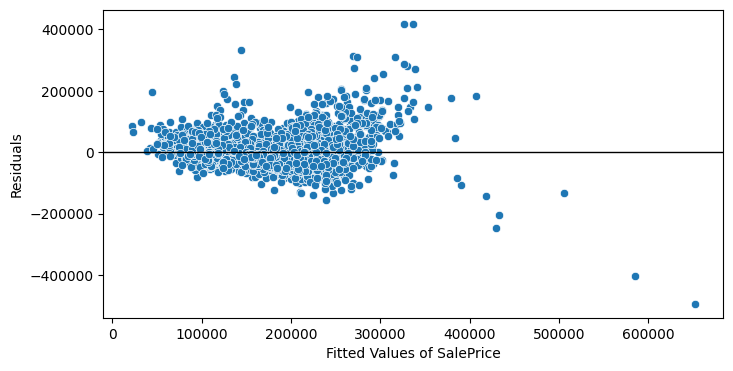

In [52]:
# Create a scatter plot between the fitted values of 'SalePrice' and the residuals
plt.figure(figsize = (8, 4))
sns.scatterplot(x = lr_model_7.fittedvalues, y = lr_model_7.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of SalePrice')
plt.ylabel('Residuals');

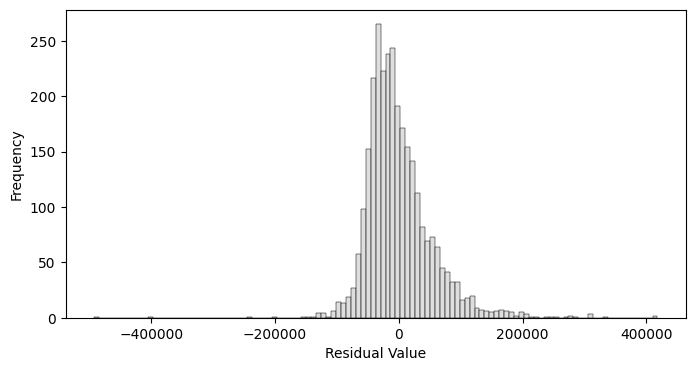

In [53]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = lr_model_7.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

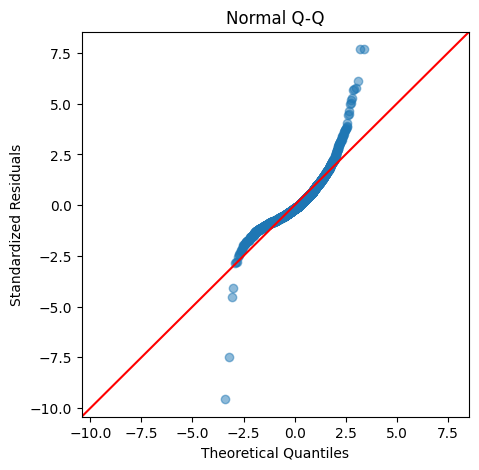

In [54]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_7.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(5, 5)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');

In [58]:
import numpy as np

# Given data
x1 = np.array([1, 2, 3, 4])
x2 = np.array([2, 5, 7, 10])
y = np.array([5, 8, 9, 16])

# Predicted values based on the regression equation
y_pred = 1 + x1 + x2

# Calculate SST, SSE, SSR
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - y_pred)**2)
SSR = np.sum((y_pred - np.mean(y))**2)

# Calculate R-squared
R_squared = SSR // SST

# Print results
print("SST:", SST)
print("SSE:", SSE)
print("SSR:", SSR)
print("R-squared:", R_squared)

SST: 65.0
SSE: 6
SSR: 65.0
R-squared: 1.0


In [59]:
SSR

65.0

In [60]:
SST

65.0

In [61]:
SSR - SSE

59.0

In [62]:
R_squared = 1 - (SSE / SST)

In [63]:
R_squared

0.9076923076923077